In [5]:
import scanpy as sc
import ringity as rng

In [10]:
# Single cell RNA-seq of three human melanoma cell lines: Ma-Mel-123, Ma-Mel-108 and Ma-Mel-93
experiment = "E-GEOD-81383"

In [11]:
# Download ebi_expression_atlas experiment
adata = sc.datasets.ebi_expression_atlas(experiment)

In [12]:
# Get cell cycle genes
cc_genes = rng.get_cell_cycle_genes(gene_id='ensembl')

In [14]:
# Calculate ring score of subspace
for cell_line in adata.obs["Sample Characteristic[cell line]"].unique():
    adata_cl = adata[adata.obs["Sample Characteristic[cell line]"] == cell_line]
    ring_score = rng.ring_score(adata_cl[:,cc_genes].X)
    print(f"{cell_line}: {ring_score}")

Ma-Mel-123: 0.12778718710283732
Ma-Mel-93: 0.7557159781705352
Ma-Mel-108: 0.5203953410349599


### Other examples

In [ ]:
# Single cell sequencing of colorectal tumors and adjacent non-malignant colon tissue
experiment = 'E-MTAB-8410'

In [48]:
for patient in adata.obs['Sample Characteristic[individual]'].unique()[:5]:
    patient_adata = adata[adata.obs['Sample Characteristic[individual]'] == patient]
    
    print(patient)
    print('-'*20)
    for site in patient_adata.obs['Sample Characteristic[sampling site]'].unique():
        site_adata = patient_adata[patient_adata.obs['Sample Characteristic[sampling site]'] == site]
        print(site, rng.ring_score(site_adata[:,cc_genes].X))
    print()

SC001 (KUL01)
--------------------
tumour core 0.4219500242700215
tumour border 0.2445110909587077
normal tissue adjacent to neoplasm 0.3980289883340874

SC019 (KUL19)
--------------------
tumour core 0.2850065834894412
tumour border 0.28759094247023764
normal tissue adjacent to neoplasm 0.27724998694187863

SC021 (KUL21)
--------------------
tumour core 0.30310338502398737
tumour border 0.434187283306244
normal tissue adjacent to neoplasm 0.11085382041415259

SC024
--------------------
tumour core 0.7150901123493594
tumour border 0.29664063496768445
normal tissue adjacent to neoplasm 0.5977673051064125

SC027
--------------------
tumour core 0.23272334848824328
tumour border 0.4494148077916549
normal tissue adjacent to neoplasm 0.4584609336249764



In [39]:
type(cc_genes)

list

In [47]:
cc_genes = rng.get_cell_cycle_genes(gene_id='ensembl')

In [45]:
type(cc_genes)

list

In [28]:
sc.pp.normalize_total(patient_adata)
sc.pp.log1p(patient_adata)

/Users/dottolab/Documents/my_stuff/ringity_testing/ringity/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [29]:
for site in patient_adata.obs['Sample Characteristic[sampling site]'].unique():
    site_adata = patient_adata[patient_adata.obs['Sample Characteristic[sampling site]'] == site]
    print(site, rng.ring_score(site_adata[:,cc_genes].X))

tumour core 0.30319775405684424
tumour border 0.07268054190400719
normal tissue adjacent to neoplasm 0.1375024632541001


In [26]:
cc_genes = rng.get_cell_cycle_genes(gene_id='ensembl')


normal tissue adjacent to neoplasm 0.3980289883340874


In [19]:
patient_adata.obs.loc[:, patient_adata.obs.nunique() > 1]['Sample Characteristic[sampling site]']

SAMEA6057388-AAAACCGAGATGGGTC                           tumour core
SAMEA6057388-AAAACCGCATGAACCT                           tumour core
SAMEA6057388-AAAACCGGTTGCGTTA                           tumour core
SAMEA6057388-AAAACCGTCGATGAGG                           tumour core
SAMEA6057388-AAAACTCAGAAACCGC                           tumour core
                                                ...                
SAMEA6057390-TTTGGTTTCAAGCCTA    normal tissue adjacent to neoplasm
SAMEA6057390-TTTGTCAAGCCACGTC    normal tissue adjacent to neoplasm
SAMEA6057390-TTTGTCACACAGGAGT    normal tissue adjacent to neoplasm
SAMEA6057390-TTTGTCAGTTTGACAC    normal tissue adjacent to neoplasm
SAMEA6057390-TTTGTCATCGGTGTTA    normal tissue adjacent to neoplasm
Name: Sample Characteristic[sampling site], Length: 8815, dtype: category
Categories (3, object): ['normal tissue adjacent to neoplasm', 'tumour border', 'tumour core']

In [10]:


# Preprocessing: Count normalization
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Get cell cycle genes
cc_genes = rng.get_cell_cycle_genes(gene_id='ensembl')

# Calculate ring score of subspace

for cell_line in adata.obs["Sample Characteristic[cell line]"].unique():
    adata_cl = adata[adata.obs["Sample Characteristic[cell line]"] == cell_line]
    print(cell_line, rng.ring_score(adata_cl[:,cc_genes].X))

  0%|          | 0.00/11.4M [00:00<?, ?B/s]

0.00B [00:00, ?B/s]

/Users/markusyoussef/Documents/coding/venvs/ringity/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Sample Characteristic[organism]' as categorical
/Users/markusyoussef/Documents/coding/venvs/ringity/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Sample Characteristic Ontology Term[organism]' as categorical
/Users/markusyoussef/Documents/coding/venvs/ringity/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: Fut

KeyError: 'Sample Characteristic[cell line]'

In [9]:
# Download melanoma samples
adata = sc.datasets.ebi_expression_atlas("E-GEOD-81383")

# Preprocessing: Count normalization
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Get cell cycle genes
cc_genes = rng.get_cell_cycle_genes(gene_id='ensembl')

# Calculate ring score of subspace

for cell_line in adata.obs["Sample Characteristic[cell line]"].unique():
    adata_cl = adata[adata.obs["Sample Characteristic[cell line]"] == cell_line]
    print(cell_line, rng.ring_score(adata_cl[:,cc_genes].X))

Ma-Mel-123 0.7754868171058791
Ma-Mel-93 0.5957423852849641
Ma-Mel-108 0.38478421944096164


In [4]:
mamel123_
rng.ring_score(mamel123_adata[:,cc_genes].X)

0.7754868171058791

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
adata.shape

(226, 23944)

In [49]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [50]:
adata.shape

(226, 23944)

In [54]:
rng.ring_score(adata[:,cc_genes].X)

0.332328958616102

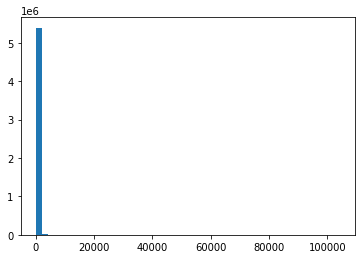

In [45]:
plt.hist(adata.X.A.flatten(), bins = 50);

In [38]:
pd.DataFrame(adata.X[:10,:10].A)

,0,1,2,3,4,5,6,7,8,9
0,103.474396,42.421158,14.166894,76.779510,531.296265,554.372070,31.038767,292.00000,22.219841,10.506041
1,1.031504,4.000000,3.000000,1.000000,4.984148,183.785950,5.813410,105.47908,35.409237,57.000000
2,108.954773,150.672043,0.000000,1.193830,13.125800,83.000000,79.000000,139.00000,7.018336,14.093799
3,1.756297,3.000000,17.482908,208.074005,0.000000,0.000000,0.000000,0.00000,3.020782,2.000000
4,2.089691,32.975075,0.000000,0.000000,9.485618,1.000000,0.000000,0.00000,10.000000,207.000000
5,20.348711,138.478058,3.639101,12.360899,54.966187,33.000000,3.040354,217.00000,5.421701,6.315918
6,0.000000,75.000000,49.000000,21.000000,1.241400,19.000000,0.000000,0.00000,3.024606,431.000000
7,3.495140,120.000000,1.000000,50.000000,3.000000,83.000000,0.000000,2.00000,79.031113,1693.794189
8,297.198608,231.379303,56.129185,68.870811,2.289146,197.759781,3.000000,137.00000,7.024256,4.032874
9,0.000000,15.000000,2.000000,0.000000,0.000000,1.000000,11.101731,5.00000,0.000000,1.000000


In [18]:
adata.obs.loc[:, adata.obs.nunique() != 1]

,Sample Characteristic[individual],Sample Characteristic Ontology Term[individual],Sample Characteristic[organism part],Sample Characteristic Ontology Term[organism part],Sample Characteristic[sampling site],Sample Characteristic Ontology Term[sampling site],Sample Characteristic[histology],Sample Characteristic Ontology Term[histology],Factor Value[single cell identifier],Factor Value Ontology Term[single cell identifier],Factor Value[histology],Factor Value Ontology Term[histology],Factor Value[sampling site],Factor Value Ontology Term[sampling site]
SRR2973279,BC01,NaN,breast,http://purl.obolibrary.org/obo/UBERON_0000310,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,estrogen-receptor positive breast cancer,http://www.ebi.ac.uk/efo/EFO_1000649,BC01_02,NaN,estrogen-receptor positive breast cancer,http://www.ebi.ac.uk/efo/EFO_1000649,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616
SRR2973280,BC01,NaN,breast,http://purl.obolibrary.org/obo/UBERON_0000310,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,estrogen-receptor positive breast cancer,http://www.ebi.ac.uk/efo/EFO_1000649,BC01_03,NaN,estrogen-receptor positive breast cancer,http://www.ebi.ac.uk/efo/EFO_1000649,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616
SRR2973281,BC01,NaN,breast,http://purl.obolibrary.org/obo/UBERON_0000310,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,estrogen-receptor positive breast cancer,http://www.ebi.ac.uk/efo/EFO_1000649,BC01_04,NaN,estrogen-receptor positive breast cancer,http://www.ebi.ac.uk/efo/EFO_1000649,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616
SRR2973282,BC01,NaN,breast,http://purl.obolibrary.org/obo/UBERON_0000310,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,estrogen-receptor positive breast cancer,http://www.ebi.ac.uk/efo/EFO_1000649,BC01_05,NaN,estrogen-receptor positive breast cancer,http://www.ebi.ac.uk/efo/EFO_1000649,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616
SRR2973283,BC01,NaN,breast,http://purl.obolibrary.org/obo/UBERON_0000310,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,estrogen-receptor positive breast cancer,http://www.ebi.ac.uk/efo/EFO_1000649,BC01_06,NaN,estrogen-receptor positive breast cancer,http://www.ebi.ac.uk/efo/EFO_1000649,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR5023668,BC11,NaN,breast,http://purl.obolibrary.org/obo/UBERON_0000310,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,triple-negative breast cancer,http://www.ebi.ac.uk/efo/EFO_0005537,BC11_69,NaN,triple-negative breast cancer,http://www.ebi.ac.uk/efo/EFO_0005537,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616
SRR5023669,BC11,NaN,breast,http://purl.obolibrary.org/obo/UBERON_0000310,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,triple-negative breast cancer,http://www.ebi.ac.uk/efo/EFO_0005537,BC11_70,NaN,triple-negative breast cancer,http://www.ebi.ac.uk/efo/EFO_0005537,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616
SRR5023670,BC11,NaN,breast,http://purl.obolibrary.org/obo/UBERON_0000310,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,triple-negative breast cancer,http://www.ebi.ac.uk/efo/EFO_0005537,BC11_78,NaN,triple-negative breast cancer,http://www.ebi.ac.uk/efo/EFO_0005537,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616
SRR5023671,BC11,NaN,breast,http://purl.obolibrary.org/obo/UBERON_0000310,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,triple-negative breast cancer,http://www.ebi.ac.uk/efo/EFO_0005537,BC11_81,NaN,triple-negative breast cancer,http://www.ebi.ac.uk/efo/EFO_0005537,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616


In [16]:
adata.obs.shape

(520, 18)

In [4]:
import random

In [5]:
adata.var_names.values

array(['ENSG00000000003', 'ENSG00000000419', 'ENSG00000000457', ...,
       'ENSG00000289701', 'ENSG00000289716', 'ENSG00000289718'],
      dtype=object)